In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

In [74]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [75]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 20)
mpl.rc('xtick',labelsize = 20)
mpl.rc('ytick',labelsize = 20)

In [76]:
act_info = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\넘블 챌린지 데이터 (1)\분해된데이터\active_info_outside.csv')
clo_info = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\넘블 챌린지 데이터 (1)\분해된데이터\close_info.csv')

In [77]:
clo_info['폐업여부'] = 1
act_info['폐업여부'] = 0

In [78]:
act_info.shape, clo_info.shape

((28982, 29), (6739, 29))

# 결측치

In [79]:
act_info.isnull().sum()

BIZ_NO                 0
CMP_PFIX_NM        10402
CMP_NM1                0
CMP_SFIX_NM        19813
CMP_ENM               17
BZ_TYP                 0
CMP_SCL                0
PBCO_GB                0
PSN_CORP_GB            0
HDOF_BR_GB             0
FR_IVST_CORP_YN        0
VENT_YN                0
LIST_CD            28893
IND_CD_ORDR           10
IND_CD1               11
IND_CD2            27782
IND_CD3            28719
PB_ORG_TYP             0
MDSCO_PRTC_YN          0
HDOF_CMP_CD        26075
ESTB_DATE           1074
ESTB_GB                0
LIST_DATE          28823
MN_BIZ_CONT          163
NATN_NM            27337
HOMEPAGE_URL       11228
CEO_NM                 1
EMP_CNT              734
폐업여부                   0
dtype: int64

In [80]:
act_info = act_info.rename(
    columns={'BIZ_NO': '사업자등록번호', 'CMP_PFIX_NM': '기업접두명', 'CMP_NM1': '기업명', 'CMP_SFIX_NM': '기업접미명', 'CMP_ENM': '기업영문명',
             'BZ_TYP': '업종', 'CMP_SCL': '기업규모', 'PBCO_GB': '공기업구분',
             'PSN_CORP_GB': '개인법인구분', 'HDOF_BR_GB': '본점지점구분', 'FR_IVST_CORP_YN': '국외투자법인여부', 'VENT_YN': '벤처기업여부',
             'LIST_CD': '상장코드', 'IND_CD_ORDR': '산업코드차수', 'IND_CD1': '산업코드1', 'IND_CD2': '산업코드2', 'IND_CD3': '산업코드3',
             'PB_ORG_TYP': '공공기관유형', 'MDSCO_PRTC_YN': '중견기업보호여부', 'HDOF_CMP_CD': '본점기업코드', 'ESTB_DATE': '설립일자',
             'ESTB_GB': '설립구분', 'LIST_DATE': '상장일자', 'MN_BIZ_CONT': '주요사업내용', 'NATN_NM': '국가명',
             'HOMEPAGE_URL': '홈페이지URL', 'CEO_NM': '대표자명', 'EMP_CNT': '직원수'})

clo_info = clo_info.rename(
    columns={'BIZ_NO': '사업자등록번호', 'CMP_PFIX_NM': '기업접두명', 'CMP_NM': '기업명', 'CMP_SFIX_NM': '기업접미명', 'CMP_ENM': '기업영문명',
             'BZ_TYP': '업종', 'CMP_SCL': '기업규모', 'PBCO_GB': '공기업구분',
             'PSN_CORP_GB': '개인법인구분', 'HDOF_BR_GB': '본점지점구분', 'FR_IVST_CORP_YN': '국외투자법인여부', 'VENT_YN': '벤처기업여부',
             'LIST_CD': '상장코드', 'IND_CD_ORDR': '산업코드차수', 'IND_CD1': '산업코드1', 'IND_CD2': '산업코드2', 'IND_CD3': '산업코드3',
             'PB_ORG_TYP': '공공기관유형', 'MDSCO_PRTC_YN': '중견기업보호여부', 'HDOF_CMP_CD': '본점기업코드', 'ESTB_DATE': '설립일자',
             'ESTB_GB': '설립구분', 'LIST_DATE': '상장일자', 'MN_BIZ_CONT': '주요사업내용', 'NATN_NM': '국가명',
             'HOMEPAGE_URL': '홈페이지URL', 'CEO_NM': '대표자명', 'EMP_CNT': '직원수'})

In [81]:
act_info = pd.concat([act_info,clo_info], axis=0,ignore_index=True)

In [82]:
act_info

,사업자등록번호,기업접두명,기업명,기업접미명,기업영문명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,...,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,1
35717,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,1
35718,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0,1
35719,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,1


In [83]:
act_info.isnull().sum()

act_info

,사업자등록번호,기업접두명,기업명,기업접미명,기업영문명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,...,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,1
35717,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,1
35718,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0,1
35719,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,1


## 결측치 확인 후 사용하지 않을 칼럼 제거

### 기업명 전처리

기업명을 제외한 기업 접두명, 접미명 칼럼 제거

In [84]:
act_info = act_info.drop(columns=['기업접두명','기업접미명','기업영문명'])

In [85]:
act_info

,사업자등록번호,기업명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,...,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
0,1138111739,한일가스산업,M,2,2,1,1,N,N,NaN,...,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,0
1,2078132193,엠피아이,M,2,2,1,1,N,N,NaN,...,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,0
2,1318167565,도영운수,M,2,2,1,1,N,N,NaN,...,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,0
3,5048128251,중원산업,M,2,2,1,1,N,N,NaN,...,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,0
4,1098164260,카타나골프,M,2,2,1,1,N,N,NaN,...,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,M,2,2,1,2,N,N,NaN,...,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,1
35717,8018501578,우진푸드중부지점,M,2,2,1,2,N,N,NaN,...,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,1
35718,4118523419,윤월드푸드코리아다크써클브로스,M,2,2,1,2,N,N,NaN,...,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0,1
35719,1738102533,기린테크,M,2,2,1,1,N,N,NaN,...,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,1


### 상장코드

상장했으면 1 상장하지 않아서 코드가 없으면 0 으로 처리

In [86]:
act_info['상장코드'] = act_info['상장코드'].fillna(0)

In [87]:
act_info['상장코드'] = act_info['상장코드'].apply(lambda x: 1 if x != 0 else x)

In [88]:
act_info['상장코드'] = act_info['상장코드'].astype('category')

## 산업코드

산업코드차수는 모두 같은 값이여서 삭제
산업코드는 앞에 2자리수까지만 사용하여 구분

산업코드 NULL 인 데이터

In [89]:
act_info.isnull().sum()

사업자등록번호         0
기업명             0
업종              0
기업규모            0
공기업구분           0
개인법인구분          0
본점지점구분          0
국외투자법인여부        0
벤처기업여부          0
상장코드            0
산업코드차수         15
산업코드1         161
산업코드2       34438
산업코드3       35447
공공기관유형          0
중견기업보호여부        0
본점기업코드      31363
설립일자         1639
설립구분            0
상장일자        35513
주요사업내용        331
국가명         33932
홈페이지URL     15842
대표자명            2
직원수          1422
폐업여부            0
dtype: int64

In [90]:
act_info = act_info.drop(columns='산업코드차수')

#['산업코드차수','산업코드1','산업코드2']

In [91]:
act_info['산업코드1'] = act_info['산업코드1'].fillna(0)

In [92]:
act_info['산업코드1'] = act_info['산업코드1']//1000


In [93]:
act_info['산업코드1'] = act_info['산업코드1'].astype('int')

In [94]:
act_info

,사업자등록번호,기업명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,...,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
0,1138111739,한일가스산업,M,2,2,1,1,N,N,0,...,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,0
1,2078132193,엠피아이,M,2,2,1,1,N,N,0,...,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,0
2,1318167565,도영운수,M,2,2,1,1,N,N,0,...,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,0
3,5048128251,중원산업,M,2,2,1,1,N,N,0,...,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,0
4,1098164260,카타나골프,M,2,2,1,1,N,N,0,...,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,M,2,2,1,2,N,N,0,...,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,1
35717,8018501578,우진푸드중부지점,M,2,2,1,2,N,N,0,...,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,1
35718,4118523419,윤월드푸드코리아다크써클브로스,M,2,2,1,2,N,N,0,...,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0,1
35719,1738102533,기린테크,M,2,2,1,1,N,N,0,...,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,1


In [95]:
act_info[act_info['설립일자'].isnull()]

,사업자등록번호,기업명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,...,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
3327,1258504073,홍원제지(주)진위공장,M,2,2,1,2,N,N,0,...,1360531.0,NaN,1,NaN,인쇄용 및 필기용 원지 제조업,NaN,www.hongwon.com,홍순호외 1명,218.0,0
11415,1238519395,주택관리공단(주)산본가야이관리,M,2,2,1,2,N,N,0,...,1308524.0,NaN,1,NaN,주택관리-서비스,NaN,NaN,서종균,NaN,0
11958,1238531860,뉴하우징의왕내손관리소,M,2,2,1,2,N,N,0,...,1308524.0,NaN,1,NaN,주택관리-서비스,NaN,NaN,서종균,NaN,0
11959,6198501815,주택관리공단(주)사천벌리일관리소,M,2,2,1,2,N,N,0,...,1308524.0,NaN,1,NaN,아파트관리,NaN,NaN,서종균,NaN,0
11965,1168500184,경동흥업(주)여의도사무소,M,2,2,1,2,N,N,0,...,1383056.0,NaN,1,NaN,내의-도소매,NaN,NaN,한기성,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35478,1548501036,타스씨앤엠,M,2,2,1,2,N,N,0,...,NaN,NaN,1,NaN,서양식 음식점업 음식점업,NaN,NaN,김진기,NaN,1
35527,8888100068,어업회사법인(유)완도참전복대물수산,M,2,2,1,1,N,N,0,...,NaN,NaN,4,NaN,도매 및 상품 중개업\r,NaN,NaN,임세남,NaN,1
35553,8178501175,광원,M,2,2,1,2,N,N,0,...,NaN,NaN,1,NaN,"토공사, 철근콘크리트공사 상하수도설비공사공사 건설업",NaN,NaN,양원일,18.0,1
35588,6618800502,알엠피플러스,M,2,2,1,1,N,N,0,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,0.0,1


## 본점기업코드

본점이 있으면 1 없으면 0으로

In [96]:
act_info['본점기업코드'] = act_info['본점기업코드'].fillna(0)

In [97]:
act_info['본점기업코드'] = act_info['본점기업코드'].apply(lambda x: 1 if x != 0 else 0)

In [98]:
act_info['본점기업코드'] = act_info['본점기업코드'].astype('category')

In [99]:
act_info

,사업자등록번호,기업명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,...,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
0,1138111739,한일가스산업,M,2,2,1,1,N,N,0,...,0,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,0
1,2078132193,엠피아이,M,2,2,1,1,N,N,0,...,0,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,0
2,1318167565,도영운수,M,2,2,1,1,N,N,0,...,0,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,0
3,5048128251,중원산업,M,2,2,1,1,N,N,0,...,0,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,0
4,1098164260,카타나골프,M,2,2,1,1,N,N,0,...,0,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,M,2,2,1,2,N,N,0,...,1,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,1
35717,8018501578,우진푸드중부지점,M,2,2,1,2,N,N,0,...,1,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,1
35718,4118523419,윤월드푸드코리아다크써클브로스,M,2,2,1,2,N,N,0,...,1,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0,1
35719,1738102533,기린테크,M,2,2,1,1,N,N,0,...,0,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,1


## 상장일자

상장일자는 상장코드와 비슷해서 제거

In [100]:
act_info = act_info.drop(columns=['상장일자','산업코드2','산업코드3'])

In [101]:
act_info

,사업자등록번호,기업명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,...,중견기업보호여부,본점기업코드,설립일자,설립구분,주요사업내용,국가명,홈페이지URL,대표자명,직원수,폐업여부
0,1138111739,한일가스산업,M,2,2,1,1,N,N,0,...,N,0,19660419.0,1,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,0
1,2078132193,엠피아이,M,2,2,1,1,N,N,0,...,N,0,19910806.0,1,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,0
2,1318167565,도영운수,M,2,2,1,1,N,N,0,...,N,0,20011030.0,1,시내버스업,NaN,transport@naver.com,김명화,149.0,0
3,5048128251,중원산업,M,2,2,1,1,N,N,0,...,N,0,19990112.0,1,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,0
4,1098164260,카타나골프,M,2,2,1,1,N,N,0,...,N,0,20000531.0,1,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,M,2,2,1,2,N,N,0,...,N,1,20180126.0,1,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN,1
35717,8018501578,우진푸드중부지점,M,2,2,1,2,N,N,0,...,N,1,20200727.0,1,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0,1
35718,4118523419,윤월드푸드코리아다크써클브로스,M,2,2,1,2,N,N,0,...,N,1,20190926.0,1,"한식, 중식",NaN,NaN,윤인수,0.0,1
35719,1738102533,기린테크,M,2,2,1,1,N,N,0,...,N,0,20211025.0,1,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN,1


In [102]:
act_info['국가명'].value_counts()

일본        420
미국        291
싱가포르      161
홍콩        115
네덜란드      111
         ... 
포르투칼        1
루마니아        1
기타(구주)      1
우크라이나       1
레바논         1
Name: 국가명, Length: 64, dtype: int64

In [103]:
OECD_list = ['스위스', '스웨덴', '덴마크', '네덜란드','노르웨이','미국','핀란드' ,'룩셈부르크','아일랜드','캐나다','독일','영국','오스트리아','뉴질랜드','아이슬란드','오스트레일리아','대한민국','벨기에','에스토니아','이스라엘','프랑스','리투아니아','일본','체코','케이만군도','버진아일랜드']

In [104]:
act_info['국가명'] = act_info['국가명'].fillna(0)

In [105]:
for item in range(len(act_info)):

    if act_info['국가명'][item] in OECD_list:
        act_info['국가명'][item] = 2

    elif act_info['국가명'][item] != 0:
        act_info['국가명'][item] = 1


<ipython-input-105-e454fd7f410f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_info['국가명'][item] = 2
<ipython-input-105-e454fd7f410f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_info['국가명'][item] = 1


In [106]:
act_info['국가명'] = act_info['국가명'].astype('category')

## 홈페이지 URL, 대표자명 제거

In [107]:
act_info = act_info.drop(columns=['홈페이지URL','대표자명'])

In [108]:
act_info['국가명'].value_counts()

0    33932
2     1257
1      532
Name: 국가명, dtype: int64

In [109]:
act_info['설립구분'] = act_info['설립구분'].astype('category')

In [110]:
act_info

,사업자등록번호,기업명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,주요사업내용,국가명,직원수,폐업여부
0,1138111739,한일가스산업,M,2,2,1,1,N,N,0,47,0,N,0,19660419.0,1,LP Gas 충전 및 판매업,0,43.0,0
1,2078132193,엠피아이,M,2,2,1,1,N,N,0,15,0,N,0,19910806.0,1,가죽 및 대용가죽제품 제조업,0,35.0,0
2,1318167565,도영운수,M,2,2,1,1,N,N,0,49,0,N,0,20011030.0,1,시내버스업,0,149.0,0
3,5048128251,중원산업,M,2,2,1,1,N,N,0,30,0,N,0,19990112.0,1,자동차 부품 제조,0,75.0,0
4,1098164260,카타나골프,M,2,2,1,1,N,N,0,46,0,N,0,20000531.0,1,골프용품 전반의 제조 및 수출업,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,M,2,2,1,2,N,N,0,10,0,N,1,20180126.0,1,간장게장(장류),0,NaN,1
35717,8018501578,우진푸드중부지점,M,2,2,1,2,N,N,0,10,0,N,1,20200727.0,1,"돈가스, 탕수육, 꿔바로우",0,22.0,1
35718,4118523419,윤월드푸드코리아다크써클브로스,M,2,2,1,2,N,N,0,56,0,N,1,20190926.0,1,"한식, 중식",0,0.0,1
35719,1738102533,기린테크,M,2,2,1,1,N,N,0,58,0,N,0,20211025.0,1,1.인공지능(AI) 솔루션 구축 및 관련사업,0,NaN,1


In [111]:
act_info.isnull().sum()

사업자등록번호        0
기업명            0
업종             0
기업규모           0
공기업구분          0
개인법인구분         0
본점지점구분         0
국외투자법인여부       0
벤처기업여부         0
상장코드           0
산업코드1          0
공공기관유형         0
중견기업보호여부       0
본점기업코드         0
설립일자        1639
설립구분           0
주요사업내용       331
국가명            0
직원수         1422
폐업여부           0
dtype: int64

In [112]:
len(act_info[act_info['산업코드1'] < 35])

13945

# 산업코드 데이터 결합

In [113]:
ind_code = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\고용노동부_표준산업분류코드_20220802 (1).csv',encoding='cp949')
oneja = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\원자재조달사정_실적_분기별.csv',encoding='cp949')

In [114]:
ind_code[ind_code['산업분류코드'] == '151']

,순번,산업분류코드,산업분류명칭,데이터기준일
257,258,151,가죽,2022-08-02


In [115]:
ind_code[ind_code['산업분류코드'] == 'A']

,순번,산업분류코드,산업분류명칭,데이터기준일
2001,2002,A,농업,2022-08-02


In [151]:
len(str(ind_code['산업분류코드']))

184

In [160]:
ind_code = ind_code[:2001]

In [163]:
ind_code['산업분류코드_int'] = ind_code['산업분류코드'].astype('int')

<ipython-input-163-0e75e537c34e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_code['산업분류코드_int'] = ind_code['산업분류코드'].astype('int')


In [171]:
ind_code

,순번,산업분류코드,산업분류명칭,데이터기준일,산업분류코드_int
0,1,1,농업,2022-08-02,1
1,2,11,작물 재배업,2022-08-02,11
2,3,111,곡물 및 기타 식량작물 재배업,2022-08-02,111
3,4,1110,곡물 및 기타 식량작물 재배업,2022-08-02,1110
4,5,112,채소,2022-08-02,112
...,...,...,...,...,...
1996,1997,99,국제 및 외국기관,2022-08-02,99
1997,1998,990,국제 및 외국기관,2022-08-02,990
1998,1999,9900,국제 및 외국기관,2022-08-02,9900
1999,2000,99001,주한 외국 공관,2022-08-02,99001


In [173]:
dfdf = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\넘블 챌린지 데이터 (1)\분해된데이터\active_info_outside.csv')

In [174]:
dfdf

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,N,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,N,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,N,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,N,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,N,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2,2,1,1,...,N,NaN,20191206.0,1,NaN,경영컨설팅업,NaN,NaN,정경태,0.0
28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,1,...,N,NaN,20200402.0,1,NaN,비주거용 건물 임대업,NaN,NaN,송성현,1.0
28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,2,...,N,1220726.0,19900108.0,1,NaN,"BIM용역, 엔지니어링컨설팅",NaN,NaN,김태남,81.0
28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,2,...,N,1583116.0,20220615.0,1,NaN,레미콘,NaN,NaN,이미성,26.0


C:\Users\yoon9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


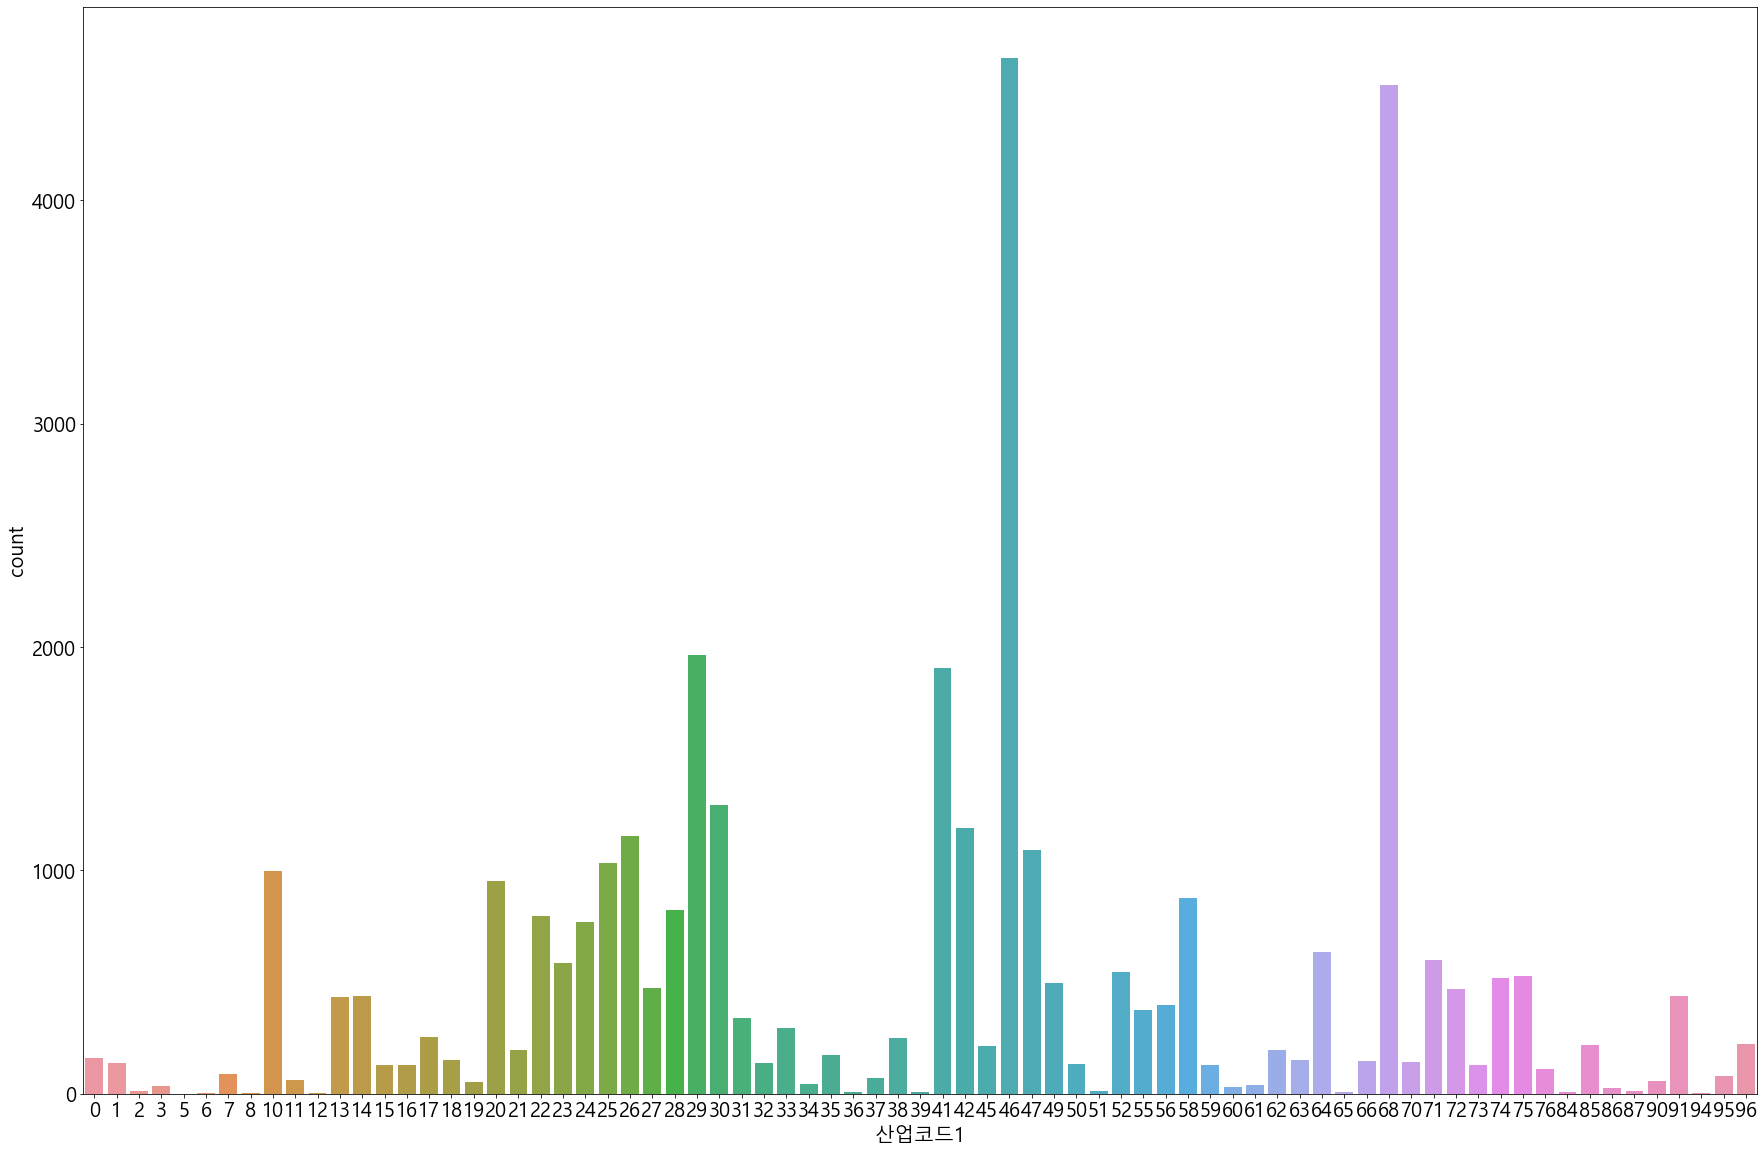

In [118]:
plt.figure(figsize=(30,20))
sns.countplot(act_info['산업코드1'])
plt.show()

In [119]:
def ind_code_cls(x):
    if (x >= 0) & (x <= 3):
        return '농업,임업 및 어업'
    elif (x >= 5) & (x <= 8):
        return '광업'
    elif (x >= 10) & (x <= 34):
        return '제조업'
    elif (x >= 35) & (x <= 35):
        return '전기,가스,증기 및 공기 조절 공급업'
    elif (x >= 36) & (x <= 39):
        return '수도, 하수 및 폐기물 처리, 원료 재생업'
    elif (x >= 41) & (x <= 42):
        return '건설업'
    elif (x >= 45) & (x <= 47):
        return '도매 및 소매업'
    elif (x >= 49) & (x <= 52):
        return '운수 및 창고업'
    elif (x >= 55) & (x <= 56):
        return '숙박 및 음식점업'
    elif (x >= 58) & (x <= 63):
        return '정보통신업'
    elif (x >= 64) & (x <= 66):
        return '금융 및 보험업'
    elif (x >= 68) & (x <= 68):
        return '부동산업'
    elif (x >= 70) & (x <= 73):
        return '전문, 과학 및 기술 서비스업'
    elif (x >= 74) & (x <= 76):
        return '사업시설 관리, 사업 지원 및 임대 서비스업'
    elif (x >= 84) & (x <= 84):
        return '공공 행정, 국방 및 사회보장 행정'
    elif (x >= 85) & (x <= 85):
        return '교육 서비스업'
    elif (x >= 86) & (x <= 87):
        return '보건업 및 사회복지 서비스업'
    elif (x >= 90) & (x <= 91):
        return '예술, 스포츠 및 여가관련 서비스업'
    elif (x >= 94) & (x <= 96):
        return '협회 및 단체'


In [ ]:
def ind_code_cls(x):
    if (x >= 0) & (x <= 3):
        return '농업,임업 및 어업' # 54309
    elif (x >= 5) & (x <= 8):
        return '광업' # 3246
    elif (x >= 10) & (x <= 34):
        return '제조업' # 111,659
    elif (x >= 35) & (x <= 35):
        return '전기,가스,증기 및 공기 조절 공급업' # 17893
    elif (x >= 36) & (x <= 39):
        return '수도, 하수 및 폐기물 처리, 원료 재생업' # 22888
    elif (x >= 41) & (x <= 42):
        return '건설업' #35349
    elif (x >= 45) & (x <= 47):
        return '도매 및 소매업'
    elif (x >= 49) & (x <= 52):
        return '운수 및 창고업'
    elif (x >= 55) & (x <= 56):
        return '숙박 및 음식점업'
    elif (x >= 58) & (x <= 63):
        return '정보통신업'
    elif (x >= 64) & (x <= 66):
        return '금융 및 보험업'
    elif (x >= 68) & (x <= 68):
        return '부동산업'
    elif (x >= 70) & (x <= 73):
        return '전문, 과학 및 기술 서비스업'
    elif (x >= 74) & (x <= 76):
        return '사업시설 관리, 사업 지원 및 임대 서비스업'
    elif (x >= 84) & (x <= 84):
        return '공공 행정, 국방 및 사회보장 행정'
    elif (x >= 85) & (x <= 85):
        return '교육 서비스업'
    elif (x >= 86) & (x <= 87):
        return '보건업 및 사회복지 서비스업'
    elif (x >= 90) & (x <= 91):
        return '예술, 스포츠 및 여가관련 서비스업'
    elif (x >= 94) & (x <= 96):
        return '협회 및 단체'


In [120]:
act_info['산업코드 대분류'] = act_info['산업코드1'].apply(lambda x: ind_code_cls(x))

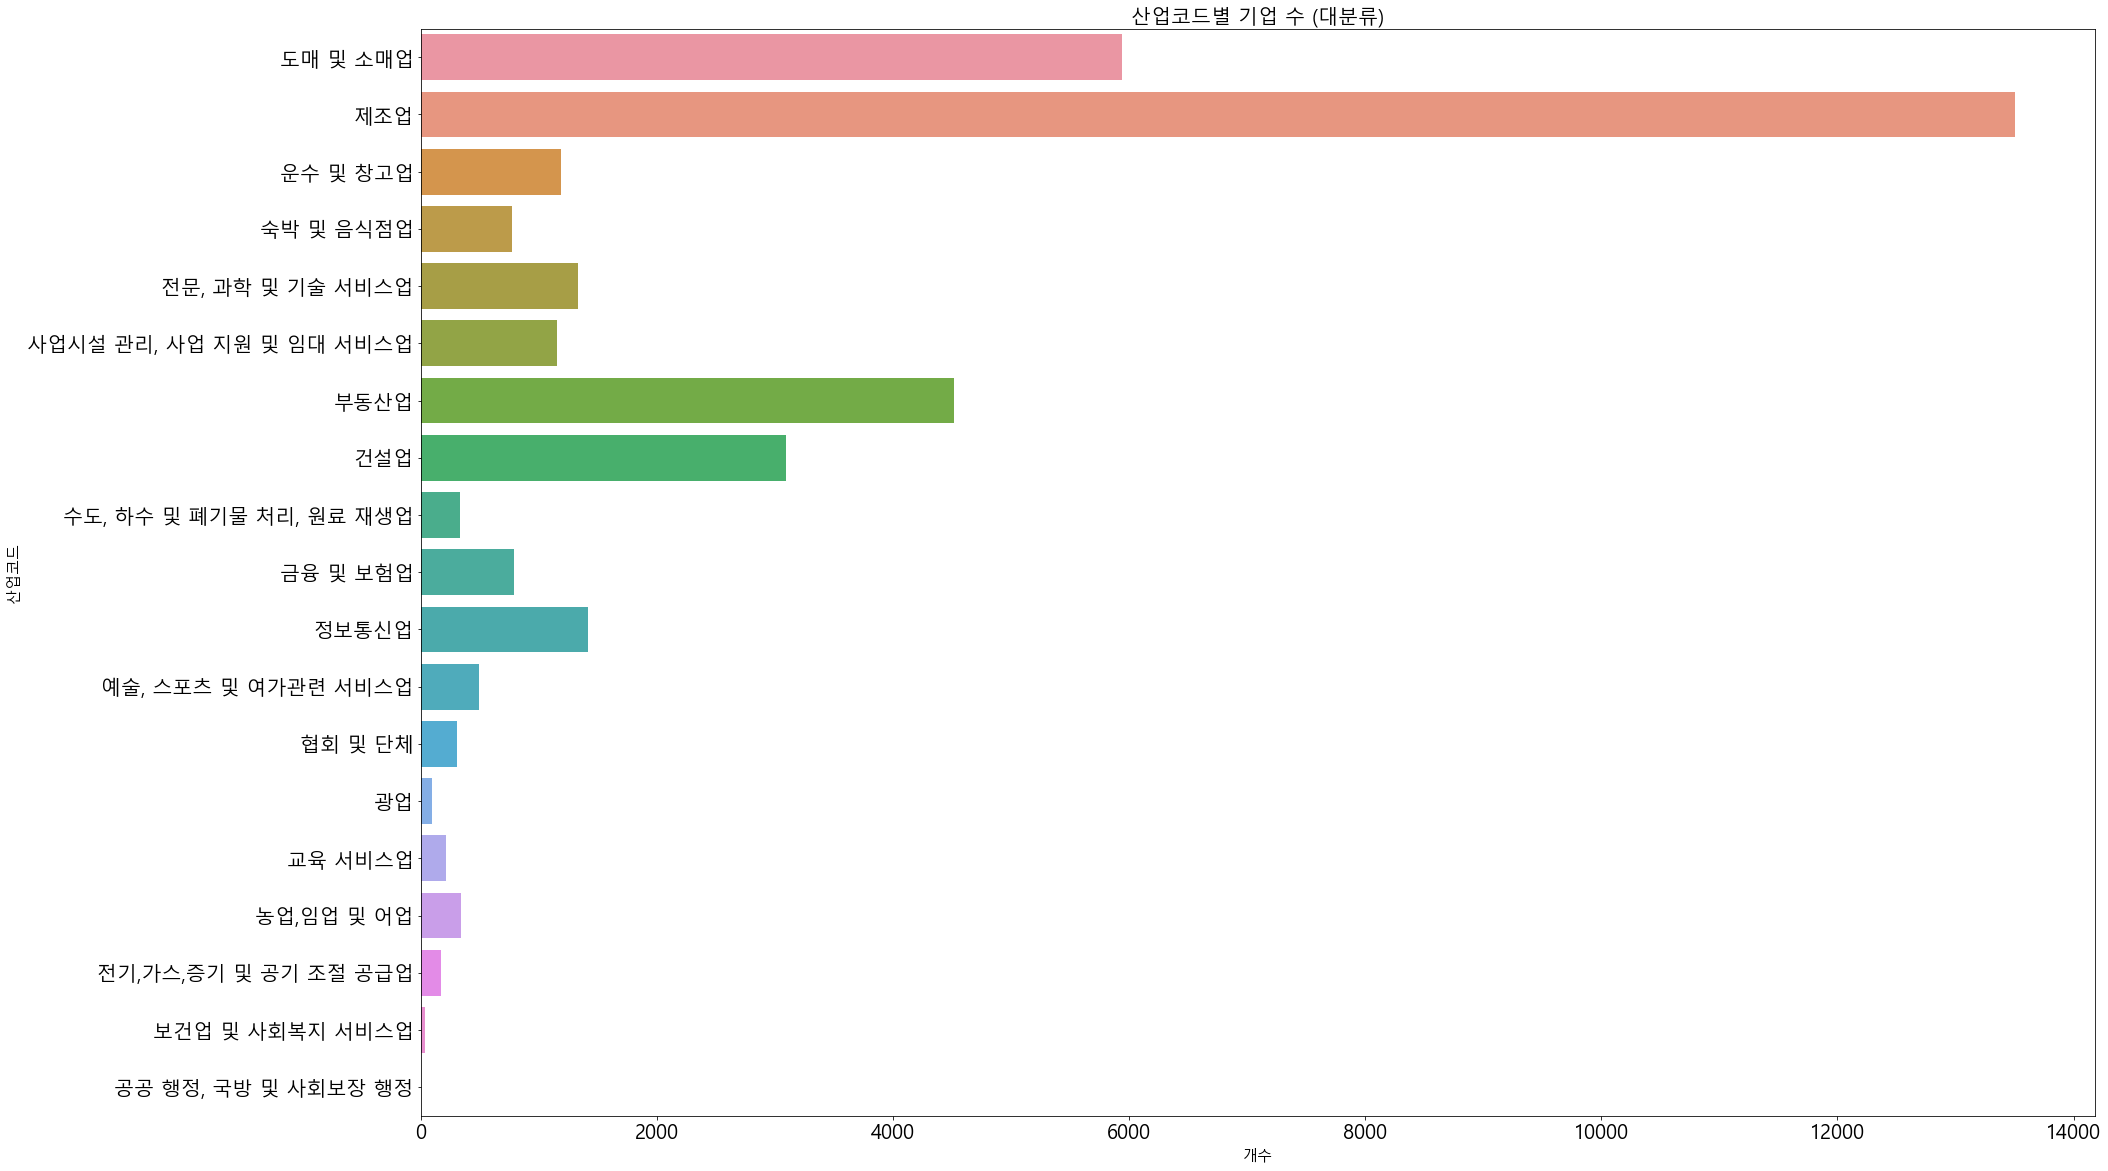

In [121]:
plt.figure(figsize=(30,20))
sns.countplot(y = act_info['산업코드 대분류'])
plt.rc('font', size=10)        # 기본 폰트 크기
plt.xlabel('개수', fontsize=15)
plt.ylabel('산업코드', fontsize=15)
plt.title('산업코드별 기업 수 (대분류)', fontsize=20)

plt.show()

# 농업, 임업 및 어업
# 광 업
# 제 조 업
# 전기,가스,증기 및 공기 조절 공급업
# 수도, 하수 및 폐기물 처리, 원료 재생업
# 건설업
# 도매 및 소매업
# 운수 및 창고업
# 숙박 및 음식점업
# 정보통신업
# 금융 및 보험업
# 부동산업
# 전문, 과학 및 기술 서비스업
# 사업시설 관리, 사업 지원 및 임대 서비스업
# 공공 행정, 국방 및 사회보장 행정
# 교육 서비스업
# 보건업 및 사회복지 서비스업
# 예술, 스포츠 및 여가관련 서비스업
# 협회 및 단체,
# 수리 및 기타 개인 서비스업 가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동 국제 및 외국기관

In [140]:
act_info['주요사업내용'].value_counts()

주택건설업                    257
부동산 임대업                  240
건축공사업                    224
부동산 개발업                  216
자동차부품 제조업                181
                        ... 
주방가구, 일반가구                 1
무역업(섬유)                    1
다코나졸캡슐, 팜시빌정 외 의약품 제조      1
정량공급장치 외                   1
결혼예식장업                     1
Name: 주요사업내용, Length: 24128, dtype: int64

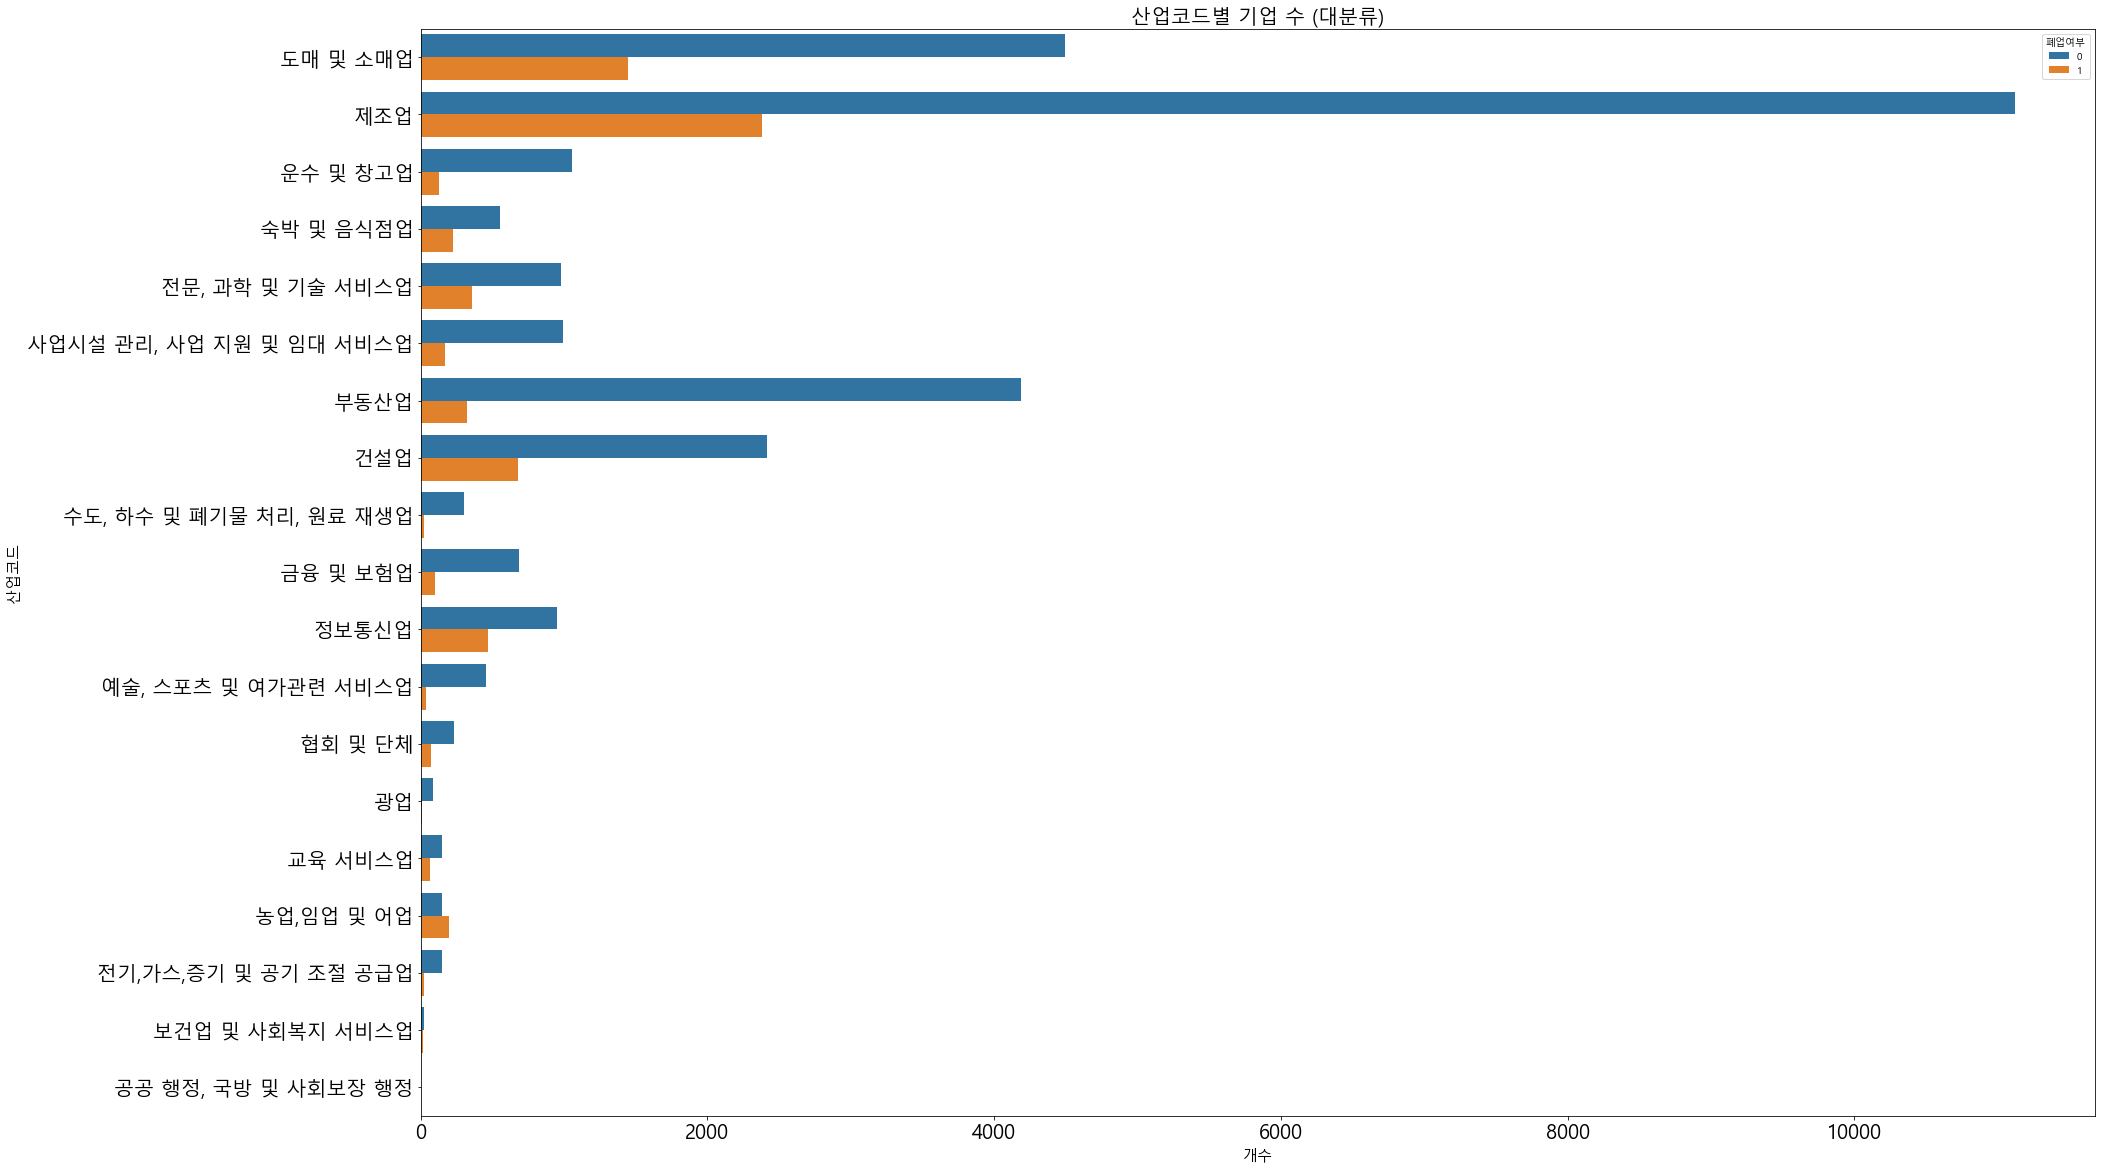

In [123]:
plt.figure(figsize=(30,20))
sns.countplot(y = act_info['산업코드 대분류'],hue=act_info['폐업여부'])
plt.rc('font', size=15)        # 기본 폰트 크기
plt.xlabel('개수', fontsize=15)
plt.ylabel('산업코드', fontsize=15)
plt.title('산업코드별 기업 수 (대분류)', fontsize=20)

plt.show()

In [124]:
222

222

In [125]:
#act_info = act_info.drop(columns = ['업종','주요사업내용'])

In [126]:
act_info['설립일자'] = act_info['설립일자'].fillna(act_info['설립일자'].mean())

In [127]:
act_info['설립일자'] = act_info['설립일자'].apply(lambda x: x+1 if (x % 100) == 0 else x)

In [128]:
act_info['설립일자'] = act_info['설립일자'].astype('int')
act_info['설립일자'] = act_info['설립일자'].astype('str')

In [129]:
act_info['설립일자'] = act_info['설립일자'].apply(lambda x: '20050101'if x == '20052466' else x)

In [130]:
from datetime import datetime

for i in range(len(act_info)):
    act_info['설립일자'][i] = datetime.strptime(act_info['설립일자'][i], '%Y%m%d')

<ipython-input-130-3a804f2dc144>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_info['설립일자'][i] = datetime.strptime(act_info['설립일자'][i], '%Y%m%d')


In [131]:
#act_info['설립일자'].str.find('66')
act_info['국외투자법인여부'] = act_info['국외투자법인여부'].apply(lambda x: 1 if x == 'Y' else 0)
act_info['벤처기업여부'] = act_info['벤처기업여부'].apply(lambda x: 1 if x == 'Y' else 0)
act_info['중견기업보호여부'] = act_info['중견기업보호여부'].apply(lambda x: 1 if x == 'Y' else 0)

In [132]:
act_info[['공기업구분','개인법인구분','본점지점구분','국외투자법인여부','벤처기업여부','공공기관유형','중견기업보호여부','설립구분']] = act_info[['공기업구분','개인법인구분','본점지점구분','국외투자법인여부','벤처기업여부','공공기관유형','중견기업보호여부','설립구분']].astype('category')

In [133]:
act_info['직원수'] = act_info['직원수'].fillna(0)

In [134]:
act_info['설립일자'] = pd.to_datetime(act_info['설립일자'])

In [135]:
act_info = act_info.drop(columns='기업규모')

In [136]:
#.to_csv('')
act_not_manufact_info =  act_info[act_info['산업코드 대분류'] != '제조업']
company_info_manu = act_info[act_info['산업코드 대분류'] == '제조업']
company_info = act_info

In [137]:
act_info['공기업구분'].value_counts()

# 날짜형 : ['설립일자']
# 타겟 : ['폐업여부']
# 스케일링 = ['직원수']
# 원핫인코딩 = ['산업코드 대분류',]
# 순서 있는 카테고리형 : ['공기업구분','개인법인구분','본점지점구분','국외투자법인여부','벤처기업여부','상장코드','공공기관유형','중견기업보호여부','본점기업코드','설립구분','국가명'](이미 타입 변경 완료)
# drop : ['사업자 등록번호','기업명','산업코드1']

2    35714
1        7
Name: 공기업구분, dtype: int64

In [138]:
# act_not_manufact_info.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\company_info(제조업 제외).csv',index=False,encoding='cp949')
# company_info_manu.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\company_info(제조업만).csv',index=False,encoding='cp949')
# company_info.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\company_info(전체).csv',index=False,encoding='cp949')

In [139]:
'''
제조업 : 96637
도매 및 소매업 : 1147 + 9346


'''

'\n제조업 : 96637\n도매 및 소매업 : 1147 + 9346\n\n\n'